## Why model explainability matters

**Trust and Transparency**<br>
People don’t trust a black box. Clear explanations help users understand why a model made a decision, which builds confidence and reduces pushback.

**Debugging and Model Improvement**<br>
Explainability exposes when a model is relying on irrelevant, noisy, or flat-out biased features. This makes it easier to fix issues and improve performance.

**Compliance and Legal Requirements**<br>
Many industries (finance, healthcare, insurance, HR) require that automated decisions be interpretable. Explainability helps meet regulatory expectations and avoid penalties.

**Ethics and Fairness**<br>
Transparent models make it possible to detect and prevent discriminatory patterns before they hit production.

**Stakeholder Buy-In**<br>
Non-technical teams—business leaders, clients, auditors—are far more willing to adopt and champion a model when the reasoning behind its outputs is understandable.

### Black Box vs White Box Models
<table> <thead> <tr> <th><b>Aspect</b></th> <th><b>Black Box Models</b></th> <th><b>White Box Models</b></th> </tr> </thead> <tbody> <tr> <td><b>Definition</b></td> <td>Internal logic is hidden or too complex to interpret.</td> <td>Fully transparent and interpretable decision-making process.</td> </tr> <tr> <td><b>Examples</b></td> <td>Deep Neural Networks, Random Forests, Gradient Boosting, LLMs.</td> <td>Linear Regression, Logistic Regression, Simple Decision Trees, Rule-Based Models.</td> </tr> <tr> <td><b>Interpretability</b></td> <td>Low — difficult to explain predictions.</td> <td>High — easy to trace how inputs influence outputs.</td> </tr> <tr> <td><b>When Useful</b></td> <td>Complex tasks needing high accuracy (NLP, vision, forecasting).</td> <td>Regulated domains requiring transparency (finance, healthcare, HR).</td> </tr> <tr> <td><b>How It Learns</b></td> <td>Captures nonlinear patterns and interactions automatically.</td> <td>Uses simple mathematical relationships or explicit rules.</td> </tr> <tr> <td><b>Pros</b></td> <td>High predictive power; handles complex data well.</td> <td>Easy to debug; transparent; simpler to justify.</td> </tr> <tr> <td><b>Cons</b></td> <td>Hard to justify decisions; may hide bias.</td> <td>Limited accuracy on complex or high-dimensional problems.</td> </tr> <tr> <td><b>Explainability Tools</b></td> <td>Requires SHAP, LIME, Grad-CAM, permutation importance.</td> <td>Explainability is inherent in model structure.</td> </tr> </tbody> </table>

## Type of explainability

**1. Global Explainability**<br>
Explains how the model behaves overall across the entire dataset.
Used to understand general patterns, feature importance, and the logic the model follows at a high level.
Useful for audits, validation, and debugging the model’s overall structure.

---

**2. Local Explainability**<br>
Focuses on a single prediction.
Explains why the model made this specific decision for one data point.
Critical for user-facing decisions, appeals, risk cases, and understanding edge behavior.

---

**3. Post-Hoc Explainability**<br>
Explainability added after the model is trained.
The model itself may be a black box, but techniques like SHAP, LIME, feature attributions, or counterfactuals help interpret its decisions.
Useful when accuracy requires complex models but transparency is still needed.

---

**4. Intrinsic Explainability**<br>
The model is inherently interpretable due to its structure.
Examples: linear models, logistic regression, decision trees, rule-based systems.
No extra tools required — the transparency is built in by design.

---

### Challenges in Model Explainability

**1. Accuracy vs. Interpretability Trade-Off** <br>
The more interpretable the model, the more you usually sacrifice raw predictive power. The more accurate the model (deep nets, ensembles), the harder it is to explain. You don’t get both for free.

**2. Domain Knowledge Requirement**<br>
Explainability isn’t just math — you need real domain expertise to judge whether the model is using the right signals. Without domain knowledge, “explanations” are just pretty charts with zero meaning.

**3. Communicating to Non-Technical Audiences**
Most stakeholders don’t care about SHAP values or feature attributions. Translating technical explanations into something business teams actually understand is its own battle.

**4. Risk of Misinterpretation**
Even good explanations can be twisted, oversimplified, or misunderstood. Partial explanations can create a false sense of trust or lead to wrong conclusions if not handled carefully.


### SHAP (SHapley Additive exPlanations)

SHAP is a method that helps us understand how a machine learning model makes decisions. It tells us how much each input (feature) is helping or hurting the final prediction. The main idea is to fairly distribute the "payout" (the prediction) among all features based on their contribution.

#### Key Characteristics
**Model-Agnostic:** Works with any machine learning model.<br>
**Fair Attribution:** Ensures consistent and fair distribution of feature importance.<br>
**Additive Feature Attribution:** Sum of SHAP values equals the model prediction minus the baseline.<br>

Unlike traditional feature importance techniques, SHAP provides local explanations (per prediction) in addition to global feature importance, making it more versatile.

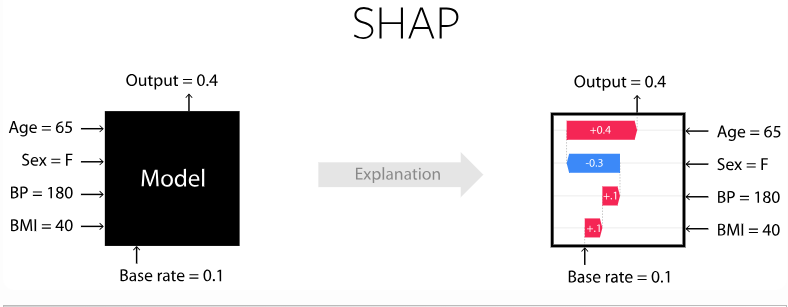

### Components of SHAP

SHAP (SHapley Additive exPlanations) breaks down model interpretability into a few core components. Understanding these components makes it easier to choose the right explainer, handle background data correctly, and interpret results visually.

#### 1. Explainers (The “Brain” of SHAP)
Explainers determine how SHAP computes feature attributions for a given model.
They can be model-specific (faster, more accurate) or model-agnostic (slower, but work for any model).

**Common SHAP Explainers:**
**TreeExplainer** - For tree-based and ensemble models (Random Forest, XGBoost, LightGBM, CatBoost). Fast, accurate, ideal when working with decision-tree architectures.<br>
**KernelExplainer** - Model-agnostic — works with any model. Uses sampling; slower but flexible. Useful when your model doesn’t have a dedicated SHAP explainer.<br>
**LinearExplainer** - Designed for linear models (Linear Regression, Logistic Regression). Efficient and exact for additive models.<br>
**DeepExplainer** - For deep learning models (TensorFlow/Keras). Uses backpropagation-based approximations.<br>

Use model-specific explainers whenever possible. They’re faster, more precise, and built for the architecture you’re using.

---

#### 2. Masker (Background / Reference Data)
Maskers define what value replaces a feature when SHAP simulates removing or “masking” that feature.

SHAP’s logic: To understand a feature’s influence, compare predictions with and without that feature.<br>

The masker decides how to fill in missing features, often using:<br>
Background samples<br>
Mean or median values<br>
Random subsets<br>
Blurred/noised versions (image/text tasks)<br>

A good masker leads to more stable, meaningful SHAP values. A bad masker leads to misleading interpretations.

---

#### 3. SHAP Plots (The Face of SHAP)
These are the visual tools used to interpret feature contributions. They help you understand which features matter, how they interact, and how they drove an individual decision.

Common SHAP Plots:<br>
**Summary Plot** - Shows global feature importance and how feature values affect predictions.<br>
**Dependence Plot** - Visualizes the relationship between one feature and its SHAP value; shows interaction effects.<br>
**Waterfall Plot** - Breaks down SHAP values for a single prediction; reveals step-by-step how the model arrived at the outcome.<br>
**Decision Plot** - Shows how groups of features contribute across multiple samples.<br>

Plots turn raw SHAP numbers into something you can explain to humans. They’re the interpretation layer.
